<a href="https://colab.research.google.com/github/paulmyr/jaxley/blob/main/notebooks/jaxley_test_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use custom jaxley build<br>
-> fork in github.com/paulmyr/jaxley.git

In [1]:
!git clone https://github.com/paulmyr/jaxley.git
!pip install tridiax

import jax
import jax.numpy as jnp
import
from jax import grad, value_and_grad
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '/content/jaxley')

import jaxley as jx


Cloning into 'jaxley'...
remote: Enumerating objects: 6441, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 6441 (delta 53), reused 34 (delta 26), pack-reused 6346 (from 2)
Receiving objects: 100% (6441/6441), 10.82 MiB | 11.64 MiB/s, done.
Resolving deltas: 100% (4744/4744), done.


/content/jaxley/jaxley/channels/non_capacitive/spike.py:30: UserWarning: The `Fire` channel does not support surrogate gradients. Its gradient will be zero after every spike.
  warn(


Added 1 recordings. See `.recordings` for details.
Added 1 recordings. See `.recordings` for details.
Added 1 external_states. See `.externals` for details.


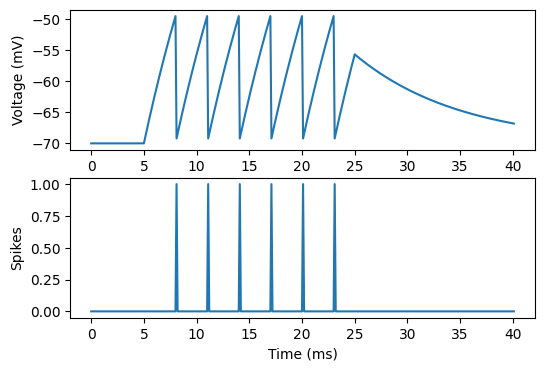

In [4]:
# Leaky integrate-and-fire neurons.
from jaxley.channels import Leak, Fire
cell = jx.Cell()
cell.insert(Leak())
cell.insert(Fire())
cell.record("v")
cell.record("Fire_spikes")

dt = 0.1
t_max = 40.0

cell.stimulate(jx.step_current(5.0, 20.0, 0.005, dt, t_max))
v = jx.integrate(cell, delta_t=dt)
time_vec = jnp.arange(0, t_max + 2 * dt, dt)
fig, ax = plt.subplots(2, 1, figsize=(6, 4))
_ = ax[0].plot(time_vec, v[0])
_ = ax[1].plot(time_vec, v[1])
_ = ax[0].set_ylabel("Voltage (mV)")
_ = ax[1].set_ylabel("Spikes")
_ = ax[1].set_xlabel("Time (ms)")